Dataset link: https://catalog.data.gov/dataset/electric-vehicle-population-data

### Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
import warnings                    
warnings.filterwarnings('ignore')

### Loading the dataset 

In [63]:
data=pd.read_csv(r"C:\Users\Gogula Vinay\OneDrive\HBIC Solutions\Projects\Electric_Vehicle_Population_Data (1).csv")
data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C05P,Yakima,Yakima,WA,98903.0,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
1,5YJRE11B48,NaN,NaN,BC,NaN,2008,TESLA,ROADSTER,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,98950,NaN,143609049,NaN,NaN,NaN
2,5YJSA1E24G,King,Seattle,WA,98103.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,POINT (-122.34301 47.659185),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,1N4AZ1CP5J,King,Shoreline,WA,98177.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,POINT (-122.382425 47.77279),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303302e+10
4,5YJ3E1EA6J,Island,Coupeville,WA,98239.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,10.0,223792649,POINT (-122.6880708 48.2179983),PUGET SOUND ENERGY INC,5.302997e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153825,1N4AZ0CP0D,San Juan,Eastsound,WA,98245.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,154379130,POINT (-122.907229 48.7016716),BONNEVILLE POWER ADMINISTRATION||ORCAS POWER &...,5.305596e+10
153826,5YJSA1E27H,Spokane,Spokane,WA,99223.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.0,204991475,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||INLAND POWER ...,5.306301e+10
153827,1G1FW6S03P,King,Seatac,WA,98188.0,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,244720059,POINT (-122.29179 47.43473),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
153828,3FMTK3SU1M,King,Kent,WA,98031.0,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,186104215,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


### Reading the column names

In [5]:
data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153830 entries, 0 to 153829
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         153830 non-null  object 
 1   County                                             153827 non-null  object 
 2   City                                               153827 non-null  object 
 3   State                                              153830 non-null  object 
 4   Postal Code                                        153827 non-null  float64
 5   Model Year                                         153830 non-null  int64  
 6   Make                                               153830 non-null  object 
 7   Model                                              153830 non-null  object 
 8   Electric Vehicle Type                              153830 non-null  object

### Finding Duplicate rows

In [6]:
data.duplicated().sum()

0

### Finding Missing values

In [7]:
data.isnull().sum()

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 339
DOL Vehicle ID                                         0
Vehicle Location                                       7
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64

### Shape of the dataset

In [8]:
data.shape 

(153830, 17)

### Removing the rows containing missing values 

In [9]:
data.dropna(axis=0,inplace=True) 
data.shape 

(153487, 17)

In [10]:
 data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

### Statistical information of the data

In [11]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,153487.000000,153487.000000,153487.000000,153487.000000,153487.000000,1.534870e+05,1.534870e+05
mean,98258.834885,2020.102432,65.716953,1271.416569,29.302827,2.124445e+08,5.303970e+10
std,302.258887,3.019529,95.145391,9078.725047,14.828606,8.054942e+07,1.616774e+07
min,98001.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,5.300195e+10
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.713445e+08,5.303301e+10
50%,98122.000000,2021.000000,17.000000,0.000000,33.000000,2.183624e+08,5.303303e+10
75%,98370.000000,2023.000000,84.000000,0.000000,43.000000,2.415135e+08,5.305307e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.307794e+10


### Finding the number of unique value in each column

In [12]:
data.nunique()

VIN (1-10)                                             9665
County                                                   39
City                                                    461
State                                                     1
Postal Code                                             536
Model Year                                               22
Make                                                     37
Model                                                   127
Electric Vehicle Type                                     2
Clean Alternative Fuel Vehicle (CAFV) Eligibility         3
Electric Range                                          102
Base MSRP                                                31
Legislative District                                     49
DOL Vehicle ID                                       153487
Vehicle Location                                        536
Electric Utility                                         74
2020 Census Tract                       

### Concise summary of the dataframe

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153487 entries, 0 to 153829
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         153487 non-null  object 
 1   County                                             153487 non-null  object 
 2   City                                               153487 non-null  object 
 3   State                                              153487 non-null  object 
 4   Postal Code                                        153487 non-null  float64
 5   Model Year                                         153487 non-null  int64  
 6   Make                                               153487 non-null  object 
 7   Model                                              153487 non-null  object 
 8   Electric Vehicle Type                              153487 non-null  object

### Loop for seeing the unique values in each column 

In [14]:
for i in data.columns:
    print(i)
    print(data[i].unique())
    print('-*-'*30)

VIN (1-10)
['5UXTA6C05P' '5YJSA1E24G' '1N4AZ1CP5J' ... '1FTBW1YK9N' 'JA3215H46G'
 '1GYKPTRL8R']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
County
['Yakima' 'King' 'Island' 'Kitsap' 'Snohomish' 'Thurston' 'Clark'
 'Whitman' 'Grant' 'Stevens' 'Chelan' 'Walla Walla' 'Spokane' 'Kittitas'
 'Pierce' 'Skagit' 'Douglas' 'Cowlitz' 'Clallam' 'Jefferson' 'Lewis'
 'Benton' 'Whatcom' 'Klickitat' 'Pend Oreille' 'Mason' 'Ferry' 'Skamania'
 'Grays Harbor' 'Franklin' 'San Juan' 'Okanogan' 'Adams' 'Asotin'
 'Pacific' 'Wahkiakum' 'Columbia' 'Lincoln' 'Garfield']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
City
['Yakima' 'Seattle' 'Shoreline' 'Coupeville' 'Seabeck' 'Bothell' 'Redmond'
 'Bellevue' 'Oak Harbor' 'Sammamish' 'Duvall' 'Auburn' 'Kirkland'
 'Kenmore' 'Lynnwood' 'Lacey' 'Rainier' 'Bainbridge Island' 'Renton'
 'Silverdale' 'Suquamish' 'Tukwila' 'Vancouver' 'Monroe' 'Pullman'
 'Marysville' 'Snohomish' 'Ed

['Plug-in Hybrid Electric Vehicle (PHEV)' 'Battery Electric Vehicle (BEV)']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Clean Alternative Fuel Vehicle (CAFV) Eligibility
['Clean Alternative Fuel Vehicle Eligible'
 'Eligibility unknown as battery range has not been researched'
 'Not eligible due to low battery range']
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Electric Range
[ 30 210 151 215 238   0 234 200  75  72 266 192  18 249 322 220  14  84
  21 233   8  16  53 107  38 308  26  19  62 291 208 204  35 239  25  29
  93 125  73  81 259 150 149 103  82  22 289  17  39  58  42  13  33  32
  83  87   6 153 270 114  34 126 258 245  27 222  20 330  24 110 111 265
  47  15  37  76  31 293  41  23  10 203 170  97  68  12  11 100 337  28
 218  40  95 124  36   9  56  51  74  48  57  59]
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Base MSRP
[     0  322

### Dropping unnecessary columns in a dataframe

In [15]:
data.drop(labels=['State','VIN (1-10)','Vehicle Location','Electric Utility','Postal Code'], axis=1, inplace=True)
data.shape

(153487, 12)

### outlier detection using boxplot

Model Year


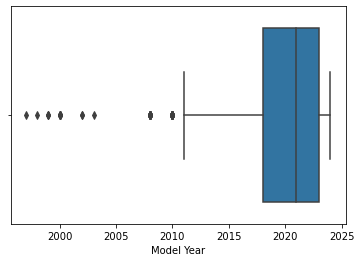

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Electric Range


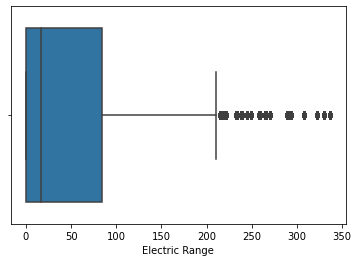

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Base MSRP


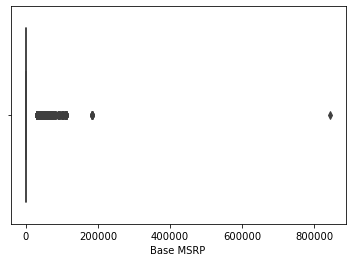

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
Legislative District


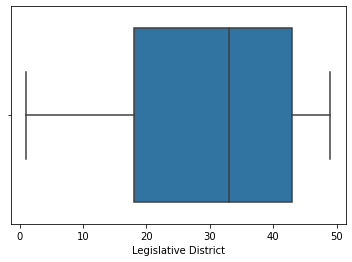

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
DOL Vehicle ID


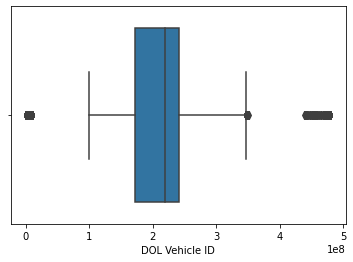

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*
2020 Census Tract


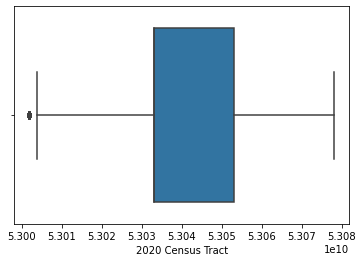

*-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-**-*


In [16]:
a=data.select_dtypes(include=["float",'int'])
for i in a:
    print(i)
    sns.boxplot(data[i])
    plt.show()
    print('*-*'*30)

### Outlier treatment using IQR method 

In [17]:
l=np.percentile(data['Electric Range'].values,[25,50,75])
iqr=l[-1]-l[0]
lw=l[0]-(1.5*iqr)
uw=l[-1]+(1.5*iqr)
a=data.loc[(data['Electric Range']<lw)]
b=data.loc[(data['Electric Range']>uw)]
print('a',a.index)
print('b',b.index)

a Int64Index([], dtype='int64')
b Int64Index([     4,      5,      6,      8,      9,     13,     15,     16,
                19,     20,
            ...
            153773, 153782, 153787, 153788, 153789, 153798, 153807, 153808,
            153811, 153824],
           dtype='int64', length=25175)


<AxesSubplot:xlabel='Electric Range'>

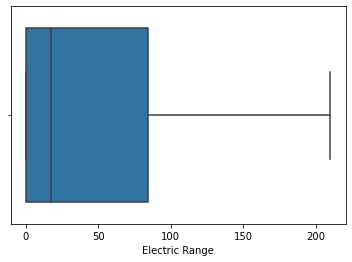

In [18]:
data.loc[b.index,'Electric Range']=uw
sns.boxplot(data['Electric Range'])

### Data Visualizarion

<AxesSubplot:ylabel='Electric Vehicle Type'>

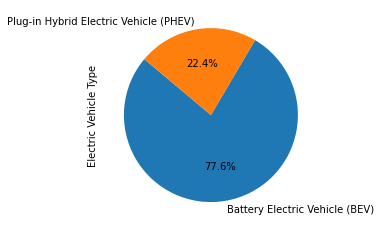

In [19]:
data["Electric Vehicle Type"].value_counts().plot(kind='pie', autopct='%1.1f%%',startangle=140 )

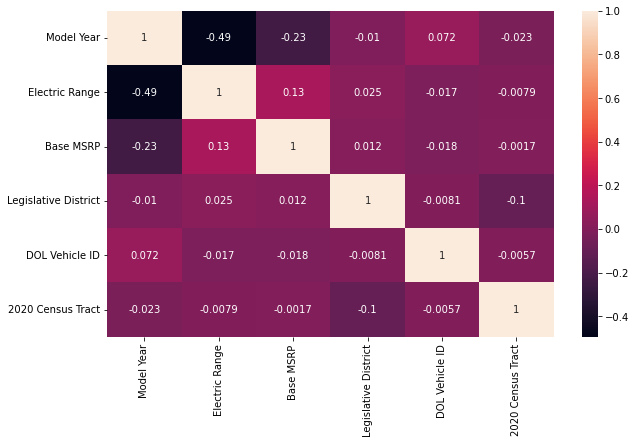

In [20]:
plt.figure(figsize = [10,6])
sns.heatmap(data.corr(),annot=True)
plt.show()

In [21]:
data.columns

Index(['County', 'City', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       '2020 Census Tract'],
      dtype='object')

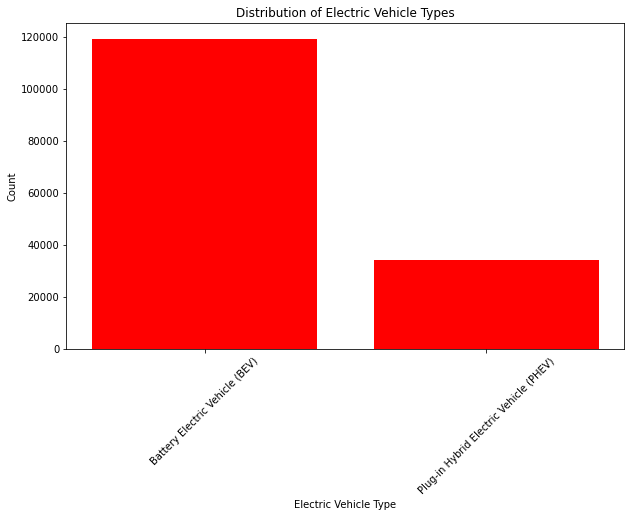

In [68]:
# Group data by 'Electric Vehicle Type' and count the occurrences of each type.
ev_type_counts = data['Electric Vehicle Type'].value_counts()
# Plot a bar chart.
plt.figure(figsize=(10, 6))
plt.bar(ev_type_counts.index, ev_type_counts.values,color='red')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.show()

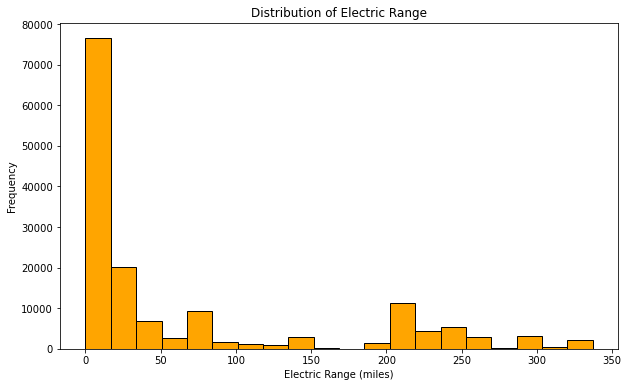

In [69]:
# Plot a histogram of 'Electric Range' column.
plt.figure(figsize=(10, 6))
plt.hist(data['Electric Range'], bins=20, edgecolor='k',color='orange')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

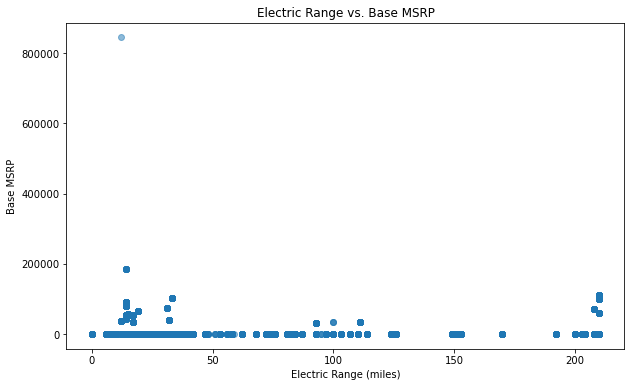

In [24]:
# Create a scatter plot of 'Electric Range' vs. 'Base MSRP'.
plt.figure(figsize=(10, 6))
plt.scatter(data['Electric Range'], data['Base MSRP'], alpha=0.5)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP')
plt.title('Electric Range vs. Base MSRP')
plt.show()


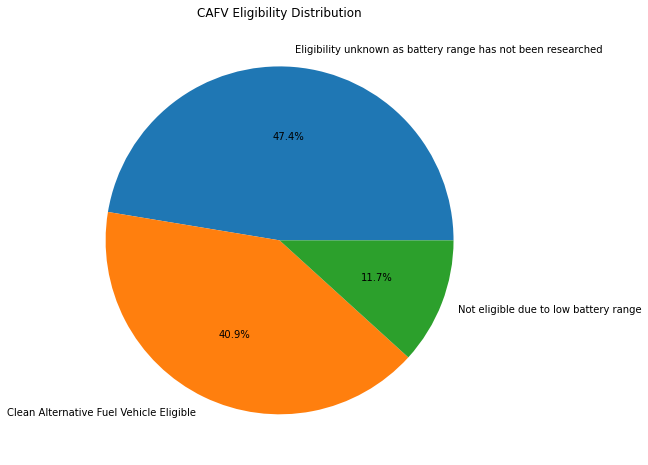

In [25]:
# Group data by 'Clean Alternative Fuel Vehicle (CAFV) Eligibility' and count the occurrences.
cafv_eligibility_counts = data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts()
# Plot a pie chart.
plt.figure(figsize=(8, 8))
plt.pie(cafv_eligibility_counts, labels=cafv_eligibility_counts.index, autopct='%1.1f%%')
plt.title('CAFV Eligibility Distribution')
plt.show()

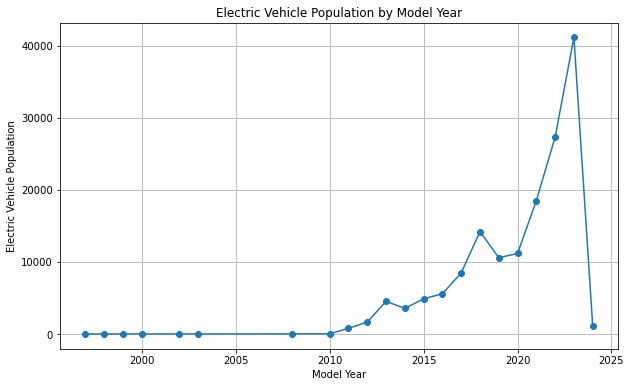

In [26]:
# Group data by 'Model Year' and count the electric vehicles in each year.
ev_population_by_year = data['Model Year'].value_counts().sort_index()
# Plot a line chart.
plt.figure(figsize=(10, 6))
plt.plot(ev_population_by_year.index, ev_population_by_year.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Electric Vehicle Population')
plt.title('Electric Vehicle Population by Model Year')
plt.grid(True)
plt.show()

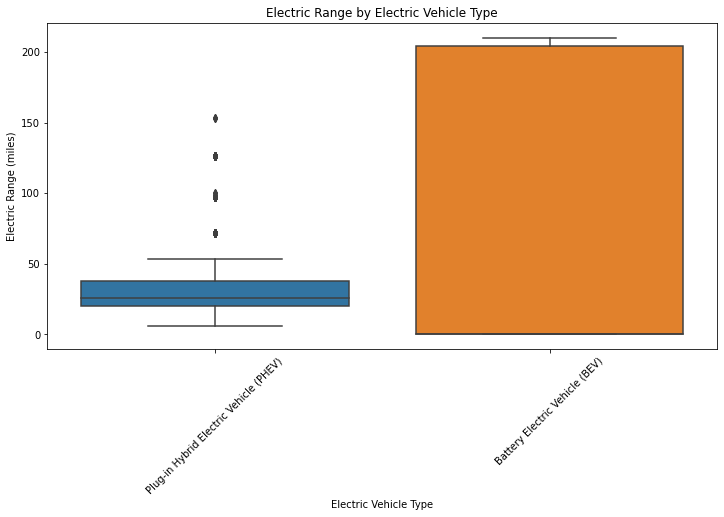

In [27]:
# Create a box plot of 'Electric Range' by 'Electric Vehicle Type'.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Electric Vehicle Type', y='Electric Range', data=data)
plt.xticks(rotation=45)
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.title('Electric Range by Electric Vehicle Type')
plt.show()

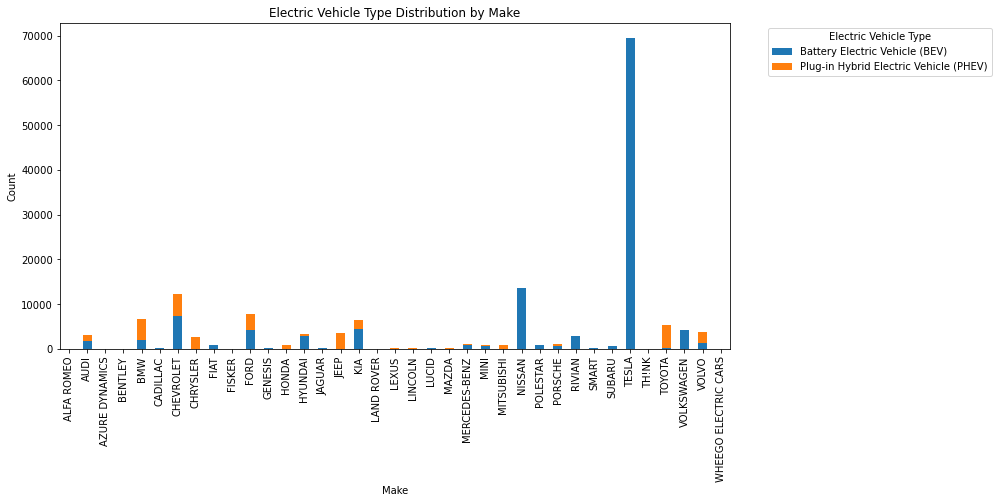

In [28]:
# Create a stacked bar chart of 'Electric Vehicle Type' by 'Make'.
ev_type_make = data.groupby(['Make', 'Electric Vehicle Type']).size().unstack(fill_value=0)
ev_type_make.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Make')
plt.ylabel('Count')
plt.title('Electric Vehicle Type Distribution by Make')
plt.legend(title='Electric Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

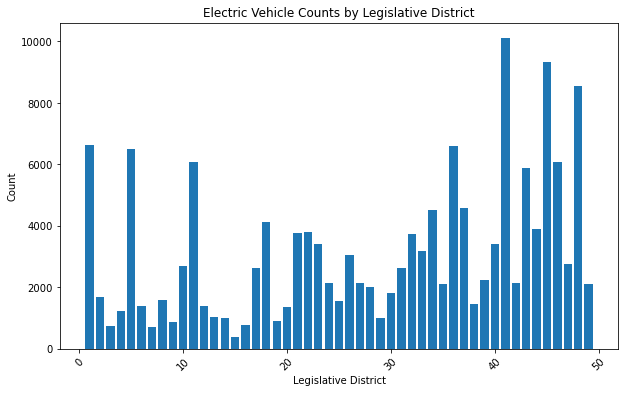

In [29]:
# Group data by 'Legislative District' and count the electric vehicles in each district.
legislative_district_counts = data['Legislative District'].value_counts()

# Plot a bar chart.
plt.figure(figsize=(10, 6))
plt.bar(legislative_district_counts.index, legislative_district_counts.values)
plt.xlabel('Legislative District')
plt.ylabel('Count')
plt.title('Electric Vehicle Counts by Legislative District')
plt.xticks(rotation=45)
plt.show()


<Figure size 864x432 with 0 Axes>

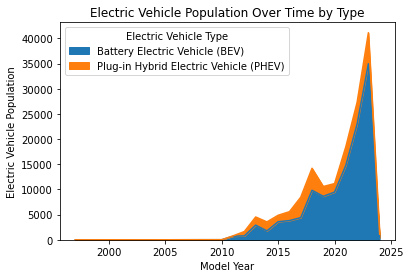

In [30]:
# Group data by 'Model Year' and 'Electric Vehicle Type' and count the electric vehicles in each combination.
ev_population_over_time = data.groupby(['Model Year', 'Electric Vehicle Type']).size().unstack(fill_value=0)

# Create a stacked area chart.
plt.figure(figsize=(12, 6))
ev_population_over_time.plot.area(stacked=True)
plt.xlabel('Model Year')
plt.ylabel('Electric Vehicle Population')
plt.title('Electric Vehicle Population Over Time by Type')
plt.show()

In [31]:
data

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,Yakima,Yakima,2023,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,5.307700e+10
2,King,Seattle,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,5.303300e+10
3,King,Shoreline,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,5.303302e+10
4,Island,Coupeville,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,10.0,223792649,5.302997e+10
5,Kitsap,Seabeck,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,35.0,125032974,5.303509e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
153825,San Juan,Eastsound,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,154379130,5.305596e+10
153826,Spokane,Spokane,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,6.0,204991475,5.306301e+10
153827,King,Seatac,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,244720059,5.303303e+10
153828,King,Kent,2021,FORD,MUSTANG MACH-E,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,33.0,186104215,5.303303e+10


In [32]:
x=[]
for i in data['Electric Vehicle Type']:
    if i[0]=='P':
        x.append('PHEV')
    else:
        x.append('BEV')

In [33]:
data['Electric Vehicle Type']=x

In [34]:
data

,County,City,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,Yakima,Yakima,2023,BMW,X5,PHEV,Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,5.307700e+10
2,King,Seattle,2016,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,5.303300e+10
3,King,Shoreline,2018,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,5.303302e+10
4,Island,Coupeville,2018,TESLA,MODEL 3,BEV,Clean Alternative Fuel Vehicle Eligible,210,0,10.0,223792649,5.302997e+10
5,Kitsap,Seabeck,2017,CHEVROLET,BOLT EV,BEV,Clean Alternative Fuel Vehicle Eligible,210,0,35.0,125032974,5.303509e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
153825,San Juan,Eastsound,2013,NISSAN,LEAF,BEV,Clean Alternative Fuel Vehicle Eligible,75,0,40.0,154379130,5.305596e+10
153826,Spokane,Spokane,2017,TESLA,MODEL S,BEV,Clean Alternative Fuel Vehicle Eligible,210,0,6.0,204991475,5.306301e+10
153827,King,Seatac,2023,CHEVROLET,BOLT EV,BEV,Eligibility unknown as battery range has not b...,0,0,33.0,244720059,5.303303e+10
153828,King,Kent,2021,FORD,MUSTANG MACH-E,BEV,Eligibility unknown as battery range has not b...,0,0,33.0,186104215,5.303303e+10


### Splitting the dataset into Dependent and independent columns

In [35]:
y=data[['Electric Vehicle Type']]
y

,Electric Vehicle Type
0,PHEV
2,BEV
3,BEV
4,BEV
5,BEV
...,...
153825,BEV
153826,BEV
153827,BEV
153828,BEV


In [36]:
x=data.drop(labels=['Electric Vehicle Type'],axis=1)
x

,County,City,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
0,Yakima,Yakima,2023,BMW,X5,Clean Alternative Fuel Vehicle Eligible,30,0,14.0,227153587,5.307700e+10
2,King,Seattle,2016,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,210,0,43.0,187728201,5.303300e+10
3,King,Shoreline,2018,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible,151,0,32.0,249867971,5.303302e+10
4,Island,Coupeville,2018,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,210,0,10.0,223792649,5.302997e+10
5,Kitsap,Seabeck,2017,CHEVROLET,BOLT EV,Clean Alternative Fuel Vehicle Eligible,210,0,35.0,125032974,5.303509e+10
...,...,...,...,...,...,...,...,...,...,...,...
153825,San Juan,Eastsound,2013,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible,75,0,40.0,154379130,5.305596e+10
153826,Spokane,Spokane,2017,TESLA,MODEL S,Clean Alternative Fuel Vehicle Eligible,210,0,6.0,204991475,5.306301e+10
153827,King,Seatac,2023,CHEVROLET,BOLT EV,Eligibility unknown as battery range has not b...,0,0,33.0,244720059,5.303303e+10
153828,King,Kent,2021,FORD,MUSTANG MACH-E,Eligibility unknown as battery range has not b...,0,0,33.0,186104215,5.303303e+10


### Splitting the dataset into training and testing

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=100)

In [38]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(115115, 11) (115115, 1)
(38372, 11) (38372, 1)


In [39]:
x_train.head()

,County,City,Model Year,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
119371,Benton,Kennewick,2018,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible,210,0,8.0,238851476,5.300501e+10
153659,King,Seattle,2023,VOLVO,XC60,Clean Alternative Fuel Vehicle Eligible,35,0,37.0,244571099,5.303301e+10
95253,Pacific,Ocean Park,2021,TOYOTA,RAV4 PRIME,Clean Alternative Fuel Vehicle Eligible,42,0,19.0,144896398,5.304995e+10
1927,King,Bellevue,2023,BMW,I4,Eligibility unknown as battery range has not b...,0,0,48.0,240316660,5.303302e+10
106209,King,Medina,2014,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible,84,0,48.0,3007035,5.303302e+10


In [40]:
x_train.dtypes

County                                                object
City                                                  object
Model Year                                             int64
Make                                                  object
Model                                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
2020 Census Tract                                    float64
dtype: object

### Data Preprocessing

In [41]:
x_train_cat = x_train.select_dtypes(include=['object'])
x_train_cat.head()

,County,City,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility
119371,Benton,Kennewick,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible
153659,King,Seattle,VOLVO,XC60,Clean Alternative Fuel Vehicle Eligible
95253,Pacific,Ocean Park,TOYOTA,RAV4 PRIME,Clean Alternative Fuel Vehicle Eligible
1927,King,Bellevue,BMW,I4,Eligibility unknown as battery range has not b...
106209,King,Medina,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible


In [42]:
x_train_num = x_train.select_dtypes(include=['int64','float64'])
x_train_num.head()

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
119371,2018,210,0,8.0,238851476,5.300501e+10
153659,2023,35,0,37.0,244571099,5.303301e+10
95253,2021,42,0,19.0,144896398,5.304995e+10
1927,2023,0,0,48.0,240316660,5.303302e+10
106209,2014,84,0,48.0,3007035,5.303302e+10


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                   columns=x_train_num.columns,
                                   index=x_train_num.index)

In [44]:
x_train_num_rescaled.head()

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
119371,-0.695816,1.831407,-0.139849,-1.436100,0.329471,-2.145026
153659,0.958688,-0.296558,-0.139849,0.519058,0.400763,-0.413832
95253,0.296887,-0.211439,-0.139849,-0.694488,-0.841623,0.633504
1927,0.958688,-0.722151,-0.139849,1.260670,0.347734,-0.413097
106209,-2.019420,0.299272,-0.139849,1.260670,-2.610189,-0.413023


In [45]:
x_train_cat.columns

Index(['County', 'City', 'Make', 'Model',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder # Labels can be normalised using LabelEncoder, it can also be used to convert labels that are not numerical into labels that are.
encoder_=LabelEncoder()
x_train_cat['County']=encoder_.fit_transform(x_train_cat['County'])
x_train_cat['City']=encoder_.fit_transform(x_train_cat['City'])
x_train_cat['Make']=encoder_.fit_transform(x_train_cat['Make'])
x_train_cat['Model']=encoder_.fit_transform(x_train_cat['Model'])
x_train_cat['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=encoder_.fit_transform(x_train_cat['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
x_train_cat

,County,City,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility
119371,2,179,31,71,0
153659,16,347,35,123,0
95253,24,271,33,96,0
1927,16,23,4,59,1
106209,16,233,25,69,0
...,...,...,...,...,...
82491,16,180,1,31,0
65734,31,374,31,71,0
77875,30,30,31,74,1
56117,31,374,31,71,1


In [47]:
data['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].unique()

array(['Clean Alternative Fuel Vehicle Eligible',
       'Eligibility unknown as battery range has not been researched',
       'Not eligible due to low battery range'], dtype=object)

In [48]:
x_train_transformed=pd.concat([x_train_num_rescaled,
                             x_train_cat,],axis=1)
x_train_transformed

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,County,City,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility
119371,-0.695816,1.831407,-0.139849,-1.436100,0.329471,-2.145026,2,179,31,71,0
153659,0.958688,-0.296558,-0.139849,0.519058,0.400763,-0.413832,16,347,35,123,0
95253,0.296887,-0.211439,-0.139849,-0.694488,-0.841623,0.633504,24,271,33,96,0
1927,0.958688,-0.722151,-0.139849,1.260670,0.347734,-0.413097,16,23,4,59,1
106209,-2.019420,0.299272,-0.139849,1.260670,-2.610189,-0.413023,16,233,25,69,0
...,...,...,...,...,...,...,...,...,...,...,...
82491,-0.364915,1.758449,-0.139849,1.193251,-0.685068,-0.412553,16,180,1,31,0
65734,-0.695816,1.831407,-0.139849,-1.570939,3.281221,1.441148,31,374,31,71,0
77875,0.296887,-0.722151,-0.139849,-1.908035,-0.752765,1.319867,30,30,31,74,1
56117,0.627788,-0.722151,-0.139849,-1.773197,-0.366912,1.440375,31,374,31,71,1


In [49]:
x_test_cat = x_test.select_dtypes(include=['object'])
x_test_cat

,County,City,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility
118026,Snohomish,Edmonds,TOYOTA,PRIUS PLUG-IN,Not eligible due to low battery range
47226,King,Kent,CHRYSLER,PACIFICA,Clean Alternative Fuel Vehicle Eligible
89929,King,Des Moines,VOLKSWAGEN,ID.4,Eligibility unknown as battery range has not b...
153430,Clark,Vancouver,TESLA,MODEL 3,Clean Alternative Fuel Vehicle Eligible
115158,King,Auburn,KIA,NIRO,Clean Alternative Fuel Vehicle Eligible
...,...,...,...,...,...
50130,Snohomish,Edmonds,VOLVO,S60,Not eligible due to low battery range
56496,Thurston,Tumwater,CHEVROLET,VOLT,Clean Alternative Fuel Vehicle Eligible
111023,Clark,Camas,NISSAN,LEAF,Clean Alternative Fuel Vehicle Eligible
10869,King,Redmond,HYUNDAI,IONIQ 5,Eligibility unknown as battery range has not b...


In [50]:
from sklearn.preprocessing import LabelEncoder # Labels can be normalised using LabelEncoder, it can also be used to convert labels that are not numerical into labels that are.
encoder_=LabelEncoder()
x_test_cat['County']=encoder_.fit_transform(x_test_cat['County'])
x_test_cat['City']=encoder_.fit_transform(x_test_cat['City'])
x_test_cat['Make']=encoder_.fit_transform(x_test_cat['Make'])
x_test_cat['Model']=encoder_.fit_transform(x_test_cat['Model'])
x_test_cat['Clean Alternative Fuel Vehicle (CAFV) Eligibility']=encoder_.fit_transform(x_test_cat['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
x_test_cat

,County,City,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility
118026,30,91,31,79,2
47226,16,150,6,76,0
89929,16,83,32,57,1
153430,5,350,30,67,0
115158,16,13,15,72,0
...,...,...,...,...,...
50130,30,91,33,98,2
56496,33,340,5,114,0
111023,5,40,24,65,0
10869,16,270,12,59,1


In [51]:
x_test_num = x_test.select_dtypes(include=['int64','float64'])
x_test_num.head()

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
118026,2014,6,0,21.0,232497345,5.306105e+10
47226,2021,32,0,33.0,179826377,5.303303e+10
89929,2021,0,0,30.0,161535832,5.303303e+10
153430,2020,210,0,49.0,220564648,5.301104e+10
115158,2020,210,0,31.0,183420464,5.303303e+10


In [52]:
x_test_num_rescaled=pd.DataFrame(scaler.transform(x_test_num),
                                columns=x_test_num.columns,
                                index=x_test_num.index)

In [53]:
x_test_num_rescaled.head()

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
118026,-2.019420,-0.649192,-0.139849,-0.559650,0.250270,1.319767
47226,0.296887,-0.333037,-0.139849,0.249381,-0.406242,-0.412769
89929,0.296887,-0.722151,-0.139849,0.047123,-0.634222,-0.412664
153430,-0.034014,1.831407,-0.139849,1.328090,0.101537,-1.772187
115158,-0.034014,1.831407,-0.139849,0.114543,-0.361444,-0.412590


In [54]:
x_test_transformed=pd.concat([x_test_num_rescaled,x_test_cat],axis=1)
x_test_transformed.head()

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract,County,City,Make,Model,Clean Alternative Fuel Vehicle (CAFV) Eligibility
118026,-2.019420,-0.649192,-0.139849,-0.559650,0.250270,1.319767,30,91,31,79,2
47226,0.296887,-0.333037,-0.139849,0.249381,-0.406242,-0.412769,16,150,6,76,0
89929,0.296887,-0.722151,-0.139849,0.047123,-0.634222,-0.412664,16,83,32,57,1
153430,-0.034014,1.831407,-0.139849,1.328090,0.101537,-1.772187,5,350,30,67,0
115158,-0.034014,1.831407,-0.139849,0.114543,-0.361444,-0.412590,16,13,15,72,0


### Model Building 

### Balancing the data by using smote 

In [55]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X_smote, y_smote = sm.fit_resample(x_train_transformed,y_train)

In [67]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_smote, y_smote)
# predicting with Knn
y_pred_knn = clf_knn.predict(x_test_transformed)
# score
from sklearn.metrics import classification_report
clf_rpt_knn = classification_report
clf_rpt_knn = classification_report(y_test, y_pred_knn)
print('classification report for KNN \n', clf_rpt_knn)

classification report for KNN 
               precision    recall  f1-score   support

         BEV       0.95      0.92      0.93     29855
        PHEV       0.75      0.83      0.78      8517

    accuracy                           0.90     38372
   macro avg       0.85      0.87      0.86     38372
weighted avg       0.90      0.90      0.90     38372



In [68]:
from sklearn.naive_bayes import GaussianNB
clf_gnb = GaussianNB()
clf_gnb.fit(X_smote, y_smote)
# Predicting with Guassian naive bayes
y_pred_gnb = clf_gnb.predict(x_test_transformed)
# score
from sklearn.metrics import classification_report
clf_rpt_NB = classification_report(y_test, y_pred_gnb)
print('classification report for Naive Bayes regression \n',clf_rpt_NB )

classification report for Naive Bayes regression 
               precision    recall  f1-score   support

         BEV       0.98      0.91      0.94     29855
        PHEV       0.75      0.93      0.83      8517

    accuracy                           0.91     38372
   macro avg       0.86      0.92      0.88     38372
weighted avg       0.93      0.91      0.92     38372



In [69]:
from sklearn.linear_model import LogisticRegression 
clf_lr = LogisticRegression()
clf_lr.fit(X_smote, y_smote)
# Prediction using Logistic regression
y_pred_lr = clf_lr.predict(x_test_transformed)
# score
from sklearn.metrics import classification_report
clf_rpt_lr = classification_report(y_test, y_pred_lr)
print('classification report for logistic regression \n',clf_rpt_lr )

classification report for logistic regression 
               precision    recall  f1-score   support

         BEV       0.95      0.88      0.91     29855
        PHEV       0.67      0.83      0.74      8517

    accuracy                           0.87     38372
   macro avg       0.81      0.85      0.82     38372
weighted avg       0.88      0.87      0.87     38372



In [70]:
from sklearn.svm import SVC
clf_svc = SVC()
clf_svc.fit(X_smote, y_smote)
# Predicting with Support vector classifier
y_pred_svc = clf_svc.predict(x_test_transformed)
# score
from sklearn.metrics import classification_report
clf_rpt_svc = classification_report(y_test, y_pred_svc)
print('classification report for SVC regression \n',clf_rpt_svc)

classification report for SVC regression 
               precision    recall  f1-score   support

         BEV       0.94      0.84      0.89     29855
        PHEV       0.59      0.81      0.68      8517

    accuracy                           0.83     38372
   macro avg       0.77      0.83      0.79     38372
weighted avg       0.86      0.83      0.84     38372



In [71]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc_smote = RandomForestClassifier()
clf_rfc_smote.fit(X_smote, y_smote)
# Predicting with Random Forest Regressor
y_pred_rfg_smote = clf_rfc_smote.predict(x_test_transformed)
from sklearn.metrics import classification_report
clf_rpt_rf_smote = classification_report(y_test, y_pred_rfg_smote)
print('classification report for Random forest using smote \n',clf_rpt_rf_smote )

classification report for Random forest using smote 
               precision    recall  f1-score   support

         BEV       1.00      1.00      1.00     29855
        PHEV       1.00      1.00      1.00      8517

    accuracy                           1.00     38372
   macro avg       1.00      1.00      1.00     38372
weighted avg       1.00      1.00      1.00     38372



In [72]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_smote, y_smote)
# predicting with decision Tree
y_pred_dt = clf_dt.predict(x_test_transformed)
# Score
from sklearn.metrics import classification_report
clf_rpt_dt = classification_report(y_test, y_pred_dt)
print('classification report for decision tree \n', clf_rpt_dt)

classification report for decision tree 
               precision    recall  f1-score   support

         BEV       0.99      1.00      1.00     29855
        PHEV       0.99      0.98      0.99      8517

    accuracy                           0.99     38372
   macro avg       0.99      0.99      0.99     38372
weighted avg       0.99      0.99      0.99     38372



In [59]:
from sklearn.ensemble import AdaBoostClassifier 
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_smote, y_smote)
# predicting with adaboost classifier
y_pred_adb = clf_adb.predict(x_test_transformed)
# Score
from sklearn.metrics import classification_report
clf_rpt_dt = classification_report(y_test, y_pred_adb)
print('classification report for  AdaBoost \n', clf_rpt_dt)

classification report for  AdaBoost 
               precision    recall  f1-score   support

         BEV       1.00      1.00      1.00     29855
        PHEV       1.00      1.00      1.00      8517

    accuracy                           1.00     38372
   macro avg       1.00      1.00      1.00     38372
weighted avg       1.00      1.00      1.00     38372



In [61]:
from sklearn.ensemble import GradientBoostingClassifier 
gbr = GradientBoostingClassifier()
gbr.fit(X_smote, y_smote)
pred_y = gbr.predict(x_test_transformed)
from sklearn.metrics import classification_report
clf_rpt_dt = classification_report(y_test, pred_y)
print('classification report for GradientBoosting \n', clf_rpt_dt)

classification report for GradientBoosting 
               precision    recall  f1-score   support

         BEV       1.00      1.00      1.00     29855
        PHEV       0.99      1.00      1.00      8517

    accuracy                           1.00     38372
   macro avg       1.00      1.00      1.00     38372
weighted avg       1.00      1.00      1.00     38372



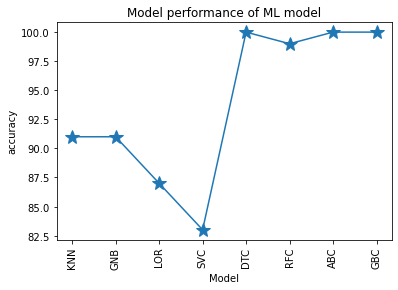

In [3]:
algorith=['KNN','GNB','LOR','SVC','DTC','RFC','ABC','GBC']
accuracy=[91,91,87,83,100,99,100,100]
plt.plot(algorith,accuracy,marker='*',markersize=15)
plt.xlabel('Model')
plt.ylabel('accuracy')
plt.title('Model performance of ML model')
plt.xticks(rotation=90)
plt.show()